# week6.1

In [3]:
renv::restore()
library(dplyr)
library(readr)
library(tidyr)
library(ggplot2)
library(purrr)
library(cowplot)
library(ISLR2)
library(stringr)
library(corrplot)


- The library is already synchronized with the lockfile.


## Agenda

1.  QQ plot
2.  map function
3.  Backward, forward, lasso and ridge regression examples
4.  CV
### Normal Distribution:

-   **Appearance:** For a normal distribution, the Q-Q plot will show
    points forming a straight line.
-   **Interpretation:** If the points lie approximately along a straight
    line, it indicates that the data follows a normal distribution.

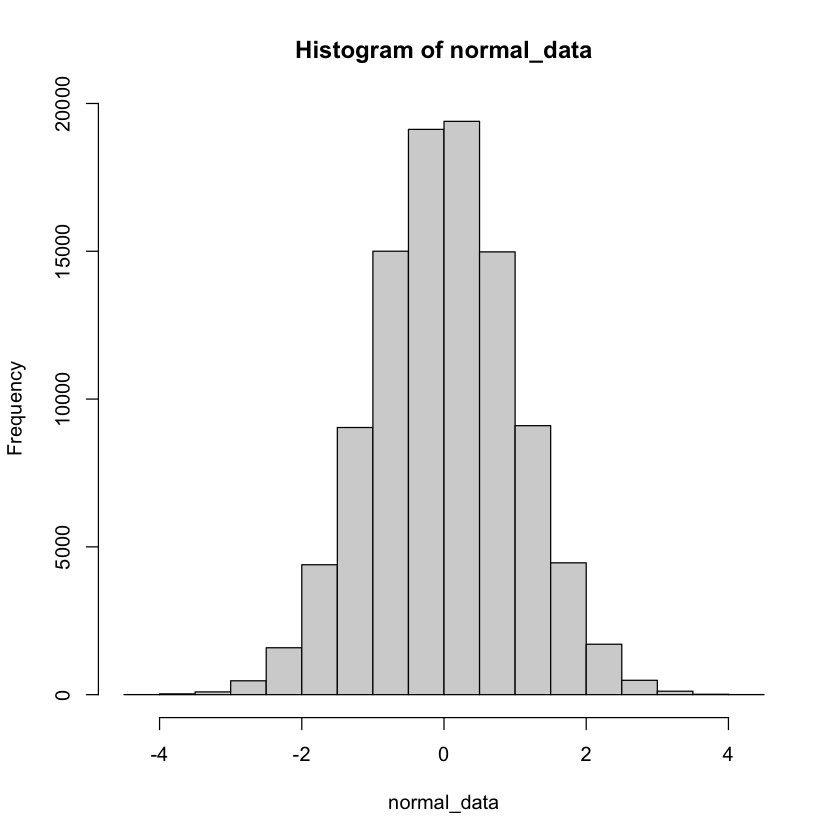

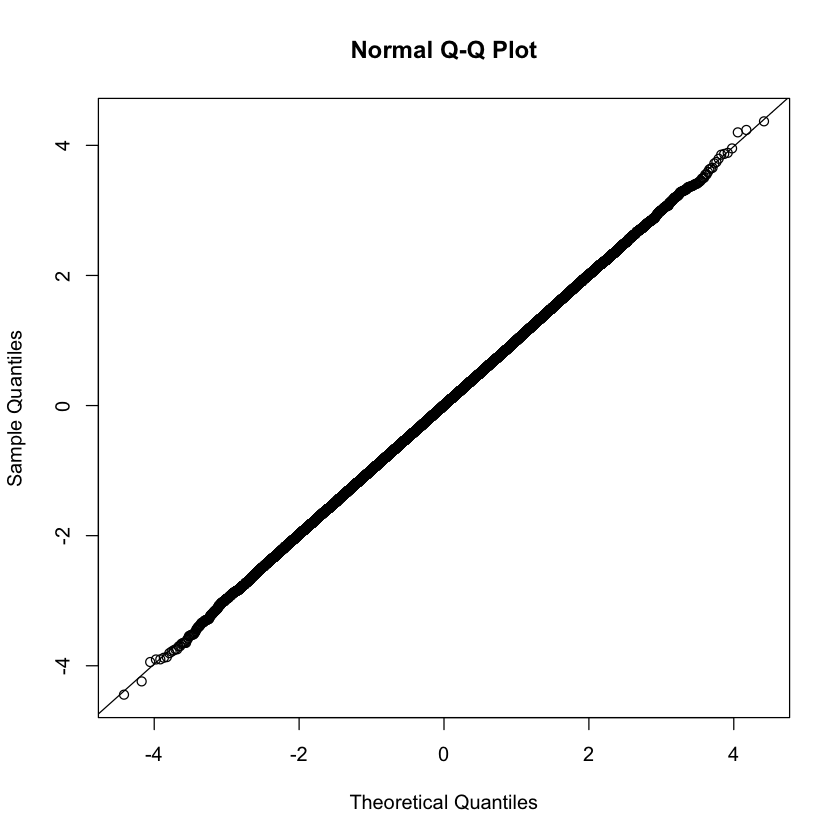

In [6]:
normal_data <- rnorm(100000, mean=0, sd = 1)
hist(normal_data)
qqnorm(normal_data)
qqline(normal_data)

### Heavy-Tailed Distribution:

-   **Appearance:** If the tail of the Q-Q plot rises more steeply than
    that of a normal distribution, it suggests heavy tails.
-   **Interpretation:** This indicates that extreme values occur more
    frequently than they would in a normal distribution. Common
    heavy-tailed distributions include the Cauchy or Pareto
    distributions.

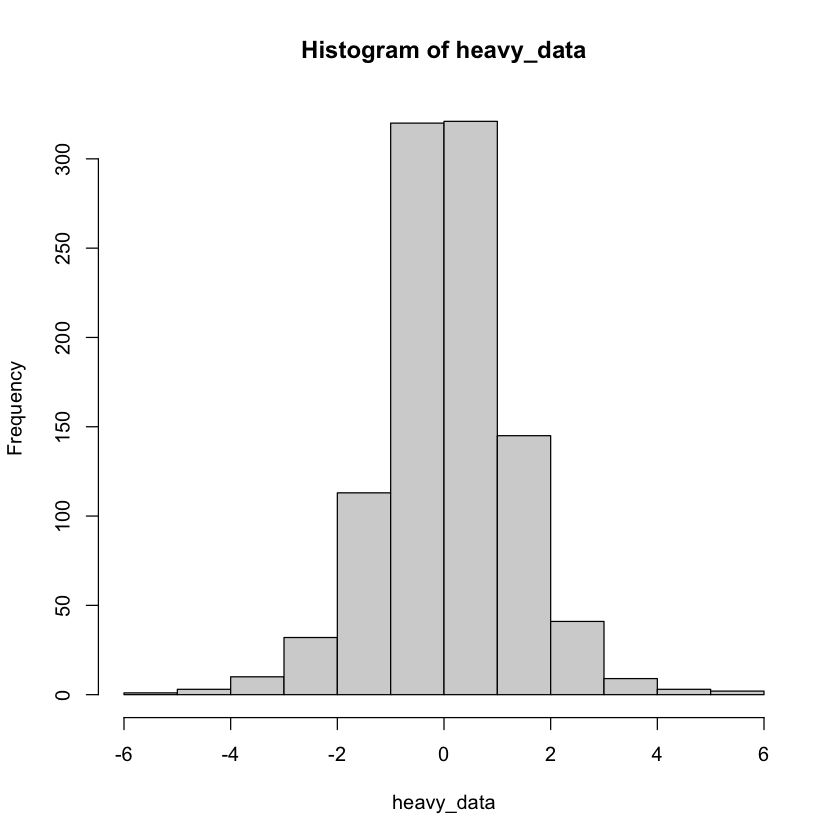

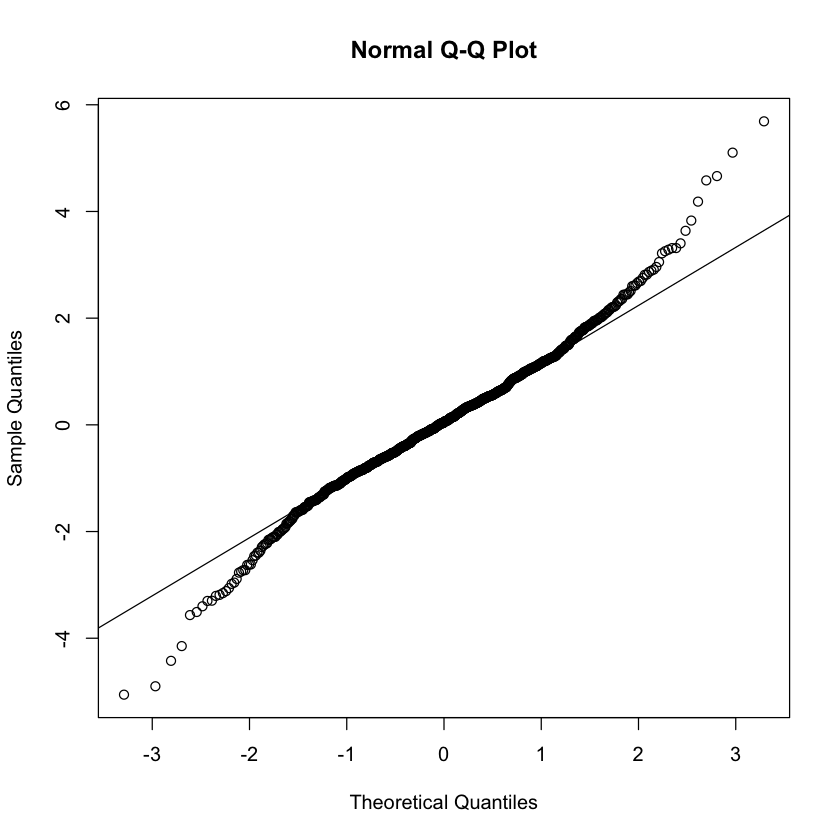

In [7]:
heavy_data <- rt(1000, 5)
hist(heavy_data)
qqnorm(heavy_data)
qqline(heavy_data)

### Light-Tailed Distribution:

-   **Appearance:** If the tail of the Q-Q plot rises less steeply than
    that of a normal distribution, it suggests light tails.
-   **Interpretation:** This means extreme values occur less frequently
    than they would in a normal distribution. Common light-tailed
    distributions include the uniform or exponential distributions.

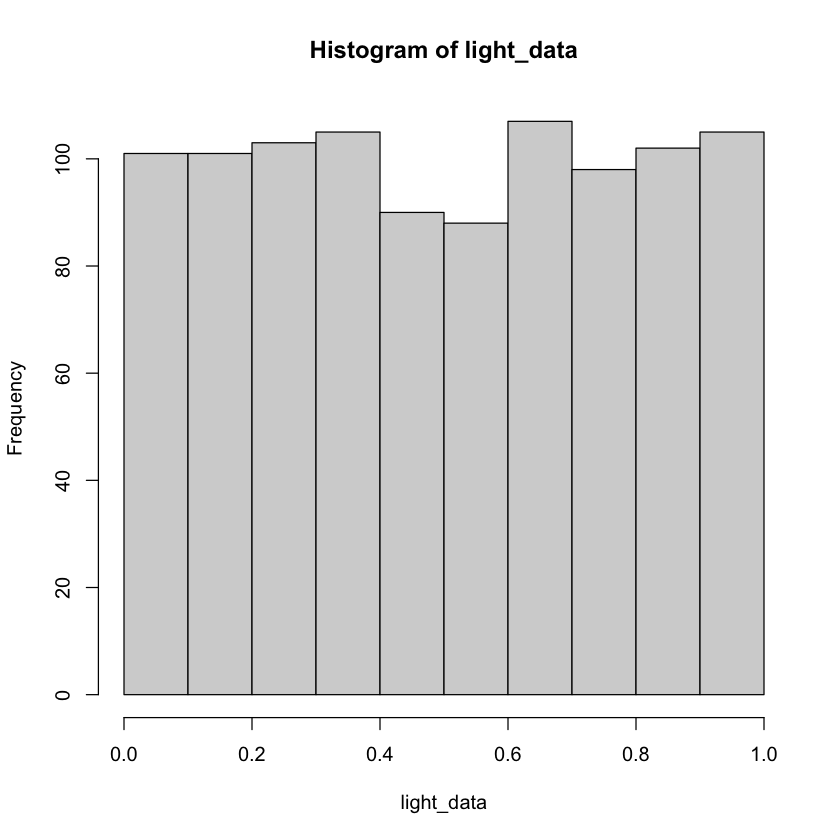

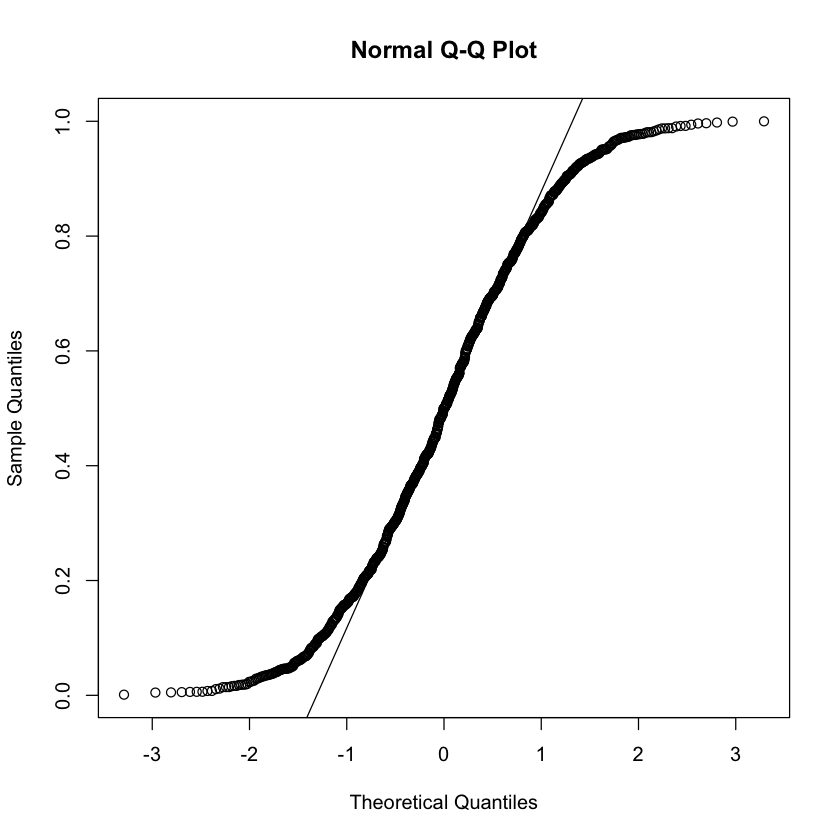

In [8]:
light_data <- runif(1000)
hist(light_data)
qqnorm(light_data)
qqline(light_data)

### Right Skew (Positive Skewness):

1.  **Q-Q Plot Appearance:**

    -   On the Q-Q plot, the points towards the left (lower quantiles)
        may be clustered more closely to the theoretical line, while the
        points on the right (higher quantiles) may deviate upwards,
        forming an upward curvature.

2.  **Interpretation:**

    -   The upward curvature on the right side indicates that the
        observed data’s right tail is longer than that of a normal
        distribution.
    -   It suggests that there are relatively more data points with
        higher values than what a normal distribution would predict.
    -   In other words, the data is skewed to the right, and there are
        some extreme values in the positive direction.

        

### Left Skew (Negative Skewness):

1.  **Q-Q Plot Appearance:**
    -   On the Q-Q plot, the points towards the right (higher quantiles)
        may be clustered more closely to the theoretical line, while the
        points on the left (lower quantiles) may deviate downwards,
        forming a downward curvature.
2.  **Interpretation:**
    -   The downward curvature on the left side indicates that the
        observed data’s left tail is longer than that of a normal
        distribution.
    -   It suggests that there are relatively more data points with
        lower values than what a normal distribution would predict.
    -   In other words, the data is skewed to the left, and there are
        some extreme values in the negative direction.

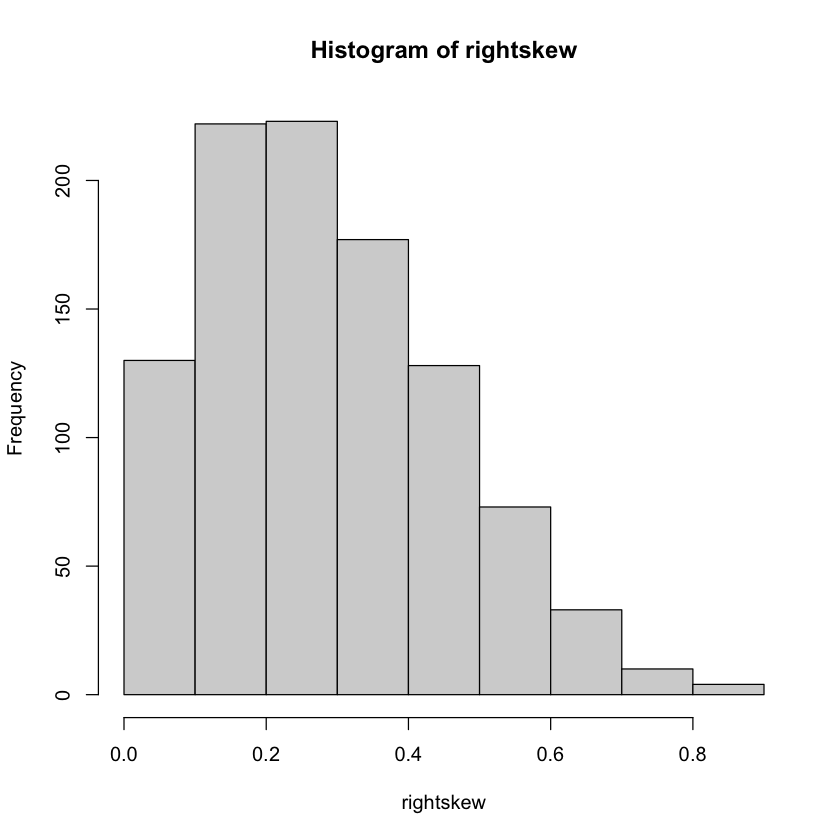

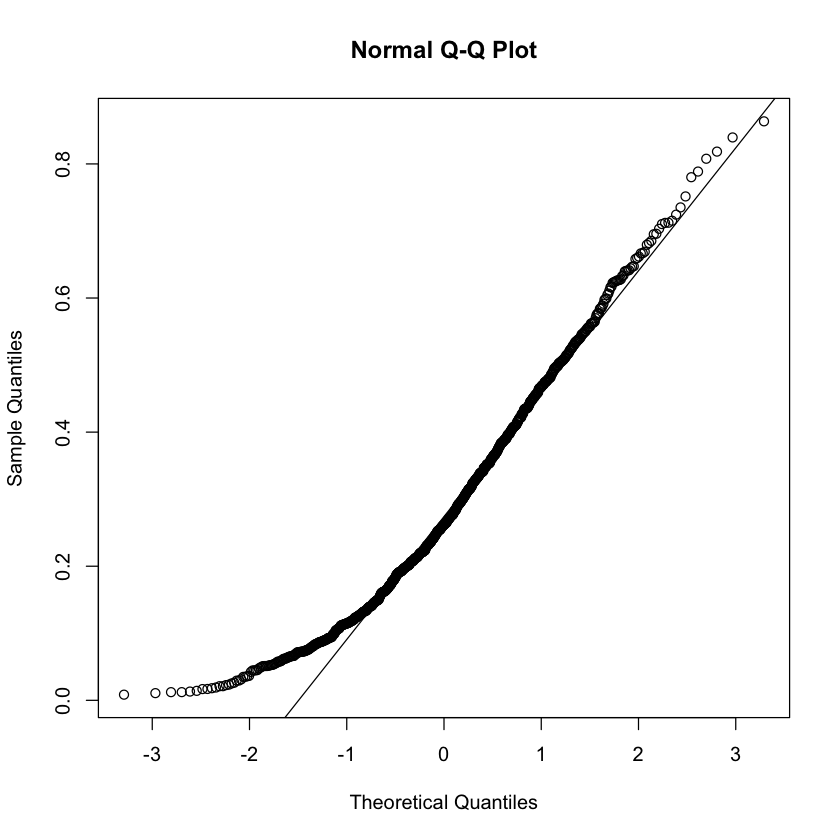

In [10]:
rightskew <- rbeta(1000, 2, 5)
hist(rightskew)

qqnorm(rightskew)
qqline(rightskew)

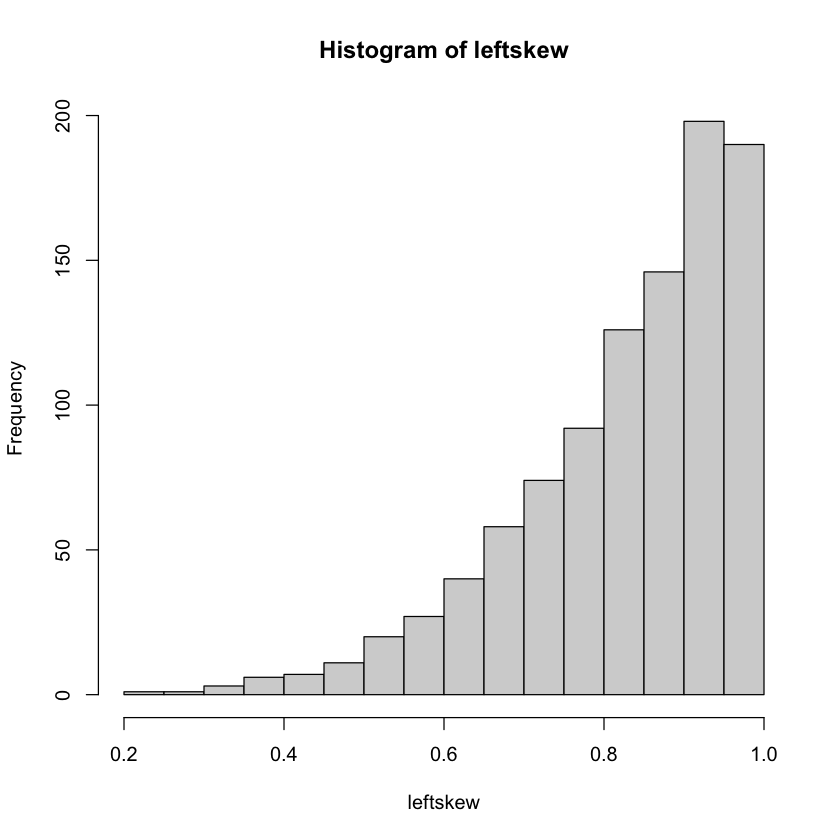

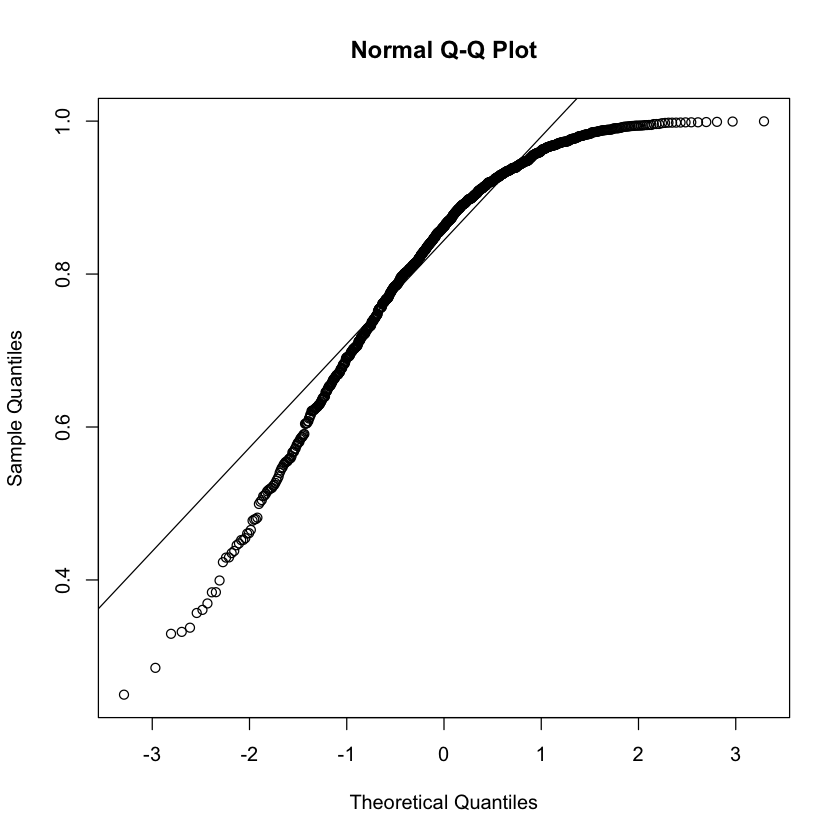

In [12]:
leftskew <- rbeta(1000, 5, 1)
hist(leftskew)
qqnorm(leftskew)
qqline(leftskew)

# map function examples

# Putting everything together

In [69]:
## ## You can use this function to generate a formula from a vector 
make_formula <- function(x){
  as.formula(
    paste("alcohol ~ ", paste(x, collapse = " + "))
  )
}
make_formula(c("a", "b", "c"))

alcohol ~ a + b + c
<environment: 0x7fbaaf5bcf98>

### data intake

In [14]:
url1 <- "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
url2 <- "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

df1 <- read_delim(url1, delim=";")
df2 <- read_delim(url2, delim=";")

Rows: 4898 Columns: 12
-- Column specification --------------------------------------------------------
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1599 Columns: 12
-- Column specification --------------------------------------------------------
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [15]:
head(df1)
head(df2)

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


In [20]:
# combine our dataset cuz we need a type column
df <- bind_rows(df1 %>% mutate(type = "white")
, df2 %>% mutate(type = "red")) %>%
mutate(type = as.factor(type)) %>% drop_na()

summary(df)

 fixed acidity    volatile acidity  citric acid     residual sugar  
 Min.   : 3.800   Min.   :0.0800   Min.   :0.0000   Min.   : 0.600  
 1st Qu.: 6.400   1st Qu.:0.2300   1st Qu.:0.2500   1st Qu.: 1.800  
 Median : 7.000   Median :0.2900   Median :0.3100   Median : 3.000  
 Mean   : 7.215   Mean   :0.3397   Mean   :0.3186   Mean   : 5.443  
 3rd Qu.: 7.700   3rd Qu.:0.4000   3rd Qu.:0.3900   3rd Qu.: 8.100  
 Max.   :15.900   Max.   :1.5800   Max.   :1.6600   Max.   :65.800  
   chlorides       free sulfur dioxide total sulfur dioxide    density      
 Min.   :0.00900   Min.   :  1.00      Min.   :  6.0        Min.   :0.9871  
 1st Qu.:0.03800   1st Qu.: 17.00      1st Qu.: 77.0        1st Qu.:0.9923  
 Median :0.04700   Median : 29.00      Median :118.0        Median :0.9949  
 Mean   :0.05603   Mean   : 30.53      Mean   :115.7        Mean   :0.9947  
 3rd Qu.:0.06500   3rd Qu.: 41.00      3rd Qu.:156.0        3rd Qu.:0.9970  
 Max.   :0.61100   Max.   :289.00      Max.   :440.0   

In [30]:
df_summary <- df %>%
group_by(type) %>% 
summarize(mean = mean(alcohol), sd = sd(alcohol), n = length(alcohol))


mean_diff = df_summary$mean %>% diff()

t1 <- mean_diff / sqrt(sum(df_summary$sd^2 * (df_summary$n-1)) / (sum(df_summary$n - 2)) * (1/nrow(df1) + 1/nrow(df2)))
t1

[1] 2.658104

In [32]:
t2 <- t.test(df%>% filter(type=="white") %>% select(alcohol),df%>% filter(type=="red") %>% select(alcohol), var.equal=T)
t2



	Two Sample t-test

data:  df %>% filter(type == "white") %>% select(alcohol) and df %>% filter(type == "red") %>% select(alcohol)
t = 2.6585, df = 6495, p-value = 0.007868
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.02397316 0.15859471
sample estimates:
mean of x mean of y 
 10.51427  10.42298 


In [39]:
mod <- lm(alcohol ~ type, data = df)
t3 <- coef(summary(mod))[, "t value"][2]
t3

typewhite 
 2.658513

In [44]:
# step model
null_mod <- lm(alcohol ~ 1, df)
full_mod <- lm(alcohol ~ ., df)


In [46]:
step(null_mod, scope=formula(full_mod), direction="both")


Start:  AIC=2290.93
alcohol ~ 1

                         Df Sum of Sq    RSS      AIC
+ density                 1    4358.2 4882.7 -1851.76
+ quality                 1    1824.3 7416.6   864.09
+ `residual sugar`        1    1193.7 8047.2  1394.27
+ `total sulfur dioxide`  1     652.6 8588.4  1817.12
+ chlorides               1     610.0 8631.0  1849.28
+ `free sulfur dioxide`   1     298.9 8942.1  2079.33
+ pH                      1     135.9 9105.1  2196.70
+ `fixed acidity`         1      84.2 9156.8  2233.46
+ `volatile acidity`      1      13.1 9227.9  2283.71
+ type                    1      10.0 9230.9  2285.86
<none>                                9241.0  2290.93
+ `citric acid`           1       1.0 9239.9  2292.21
+ sulphates               1       0.1 9240.9  2292.87

Step:  AIC=-1851.76
alcohol ~ density

                         Df Sum of Sq    RSS     AIC
+ type                    1     603.8 4278.9 -2707.4
+ `fixed acidity`         1     565.1 4317.7 -2648.8
+ quality   


Call:
lm(formula = alcohol ~ density + type + `residual sugar` + `fixed acidity` + 
    pH + sulphates + `volatile acidity` + quality + `citric acid` + 
    `free sulfur dioxide` + chlorides, data = df)

Coefficients:
          (Intercept)                density              typewhite  
            6.502e+02             -6.571e+02             -1.155e+00  
     `residual sugar`        `fixed acidity`                     pH  
            2.287e-01              5.225e-01              2.608e+00  
            sulphates     `volatile acidity`                quality  
            9.940e-01              7.847e-01              1.029e-01  
        `citric acid`  `free sulfur dioxide`              chlorides  
            5.240e-01             -3.533e-03             -9.086e-01  


In [54]:
vif(full_mod)

`fixed acidity`     `volatile acidity`          `citric acid` 
              3.219951               2.212586               1.598672 
      `residual sugar`              chlorides  `free sulfur dioxide` 
              5.022089               1.656529               2.235345 
`total sulfur dioxide`                density                     pH 
              4.057487               6.861487               1.865609 
             sulphates                quality                   type 
              1.488582               1.389019               6.285361

In [55]:
# lasso / ridge
library(glmnet)

Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Loaded glmnet 4.1-8



In [57]:
make_model_matrix <- function(formula){
  X <- model.matrix(formula, df)[, -1]
  cnames <- colnames(X)
  for(i in 1:ncol(X)){
    if(!cnames[i] == "typewhite"){
      X[, i] <- scale(X[, i])
    } else {
      colnames(X)[i] <- "type"
    }
  }
  return(X)
}

make_model_matrix(formula(full_mod))

,`fixed acidity`,`volatile acidity`,`citric acid`,`residual sugar`,chlorides,`free sulfur dioxide`,`total sulfur dioxide`,density,pH,sulphates,quality,type
1,-0.16607641,-0.423150460,0.284664137,3.2066822,-0.3149508,0.81550254,0.95990172,2.102051861,-1.358944267,-0.546136222,0.2079830,1
2,-0.70601915,-0.240930814,0.147034810,-0.8077751,-0.2007747,-0.93103539,0.28759540,-0.232314037,0.506875873,-0.277329629,0.2079830,1
3,0.68240504,-0.362410578,0.559922792,0.3061843,-0.1722307,-0.02959646,-0.33163410,0.134514890,0.258099854,-0.613337871,0.2079830,1
4,-0.01180706,-0.666109987,0.009405483,0.6424739,0.0561215,0.92818241,1.24297807,0.301255311,-0.177258178,-0.882144464,0.2079830,1
5,-0.01180706,-0.666109987,0.009405483,0.6424739,0.0561215,0.92818241,1.24297807,0.301255311,-0.177258178,-0.882144464,0.2079830,1
6,0.68240504,-0.362410578,0.559922792,0.3061843,-0.1722307,-0.02959646,-0.33163410,0.134514890,0.258099854,-0.613337871,0.2079830,1
7,-0.78315383,-0.119451050,-1.091629136,0.3272024,-0.3149508,-0.02959646,0.35836449,0.067818721,-0.239452183,-0.411732925,0.2079830,1
8,-0.16607641,-0.423150460,0.284664137,3.2066822,-0.3149508,0.81550254,0.95990172,2.102051861,-1.358944267,-0.546136222,0.2079830,1
9,-0.70601915,-0.240930814,0.147034810,-0.8077751,-0.2007747,-0.93103539,0.28759540,-0.232314037,0.506875873,-0.277329629,0.2079830,1
10,0.68240504,-0.726849869,0.766366783,-0.8287932,-0.3434949,-0.14227633,0.23451859,-0.299010205,0.009323836,-0.546136222,0.2079830,1


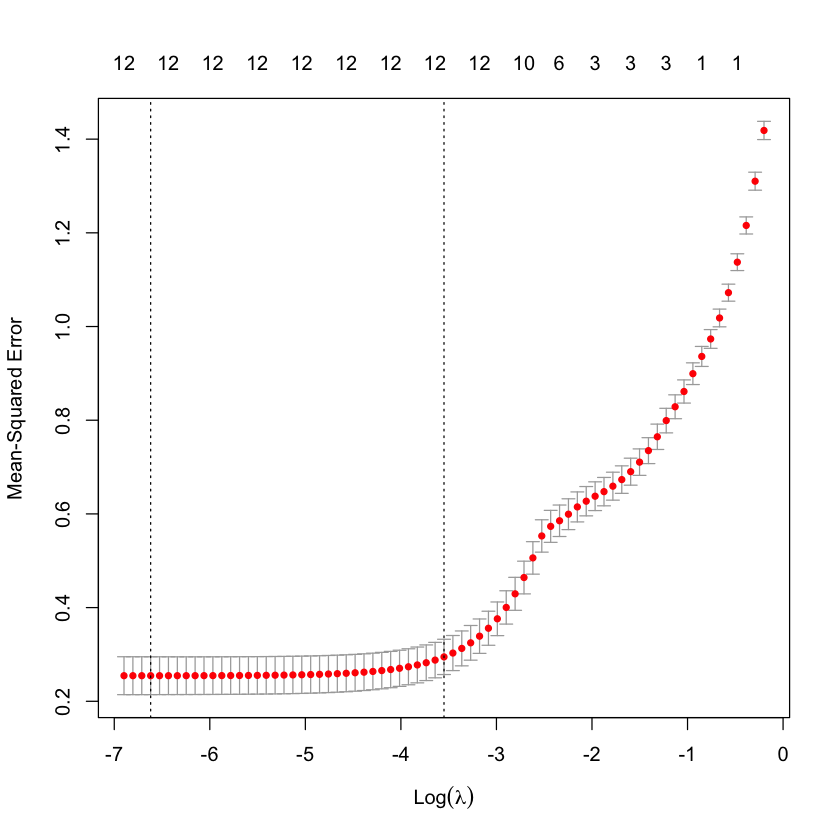

In [61]:
lasso <- cv.glmnet(make_model_matrix(full_mod), df$alcohol, alpha = 1)
plot(lasso)

In [71]:

vars <- rownames(coef(lasso))[which(abs(coef(lasso)) > 0)][-1]
make_formula(vars)



alcohol ~ `fixed acidity` + `volatile acidity` + `citric acid` + 
    `residual sugar` + chlorides + `free sulfur dioxide` + `total sulfur dioxide` + 
    density + pH + sulphates + quality + type
<environment: 0x7fbaaa2a97f0>

[1] 0.001334809

[1] 0.001334809

[1] 0.02875758

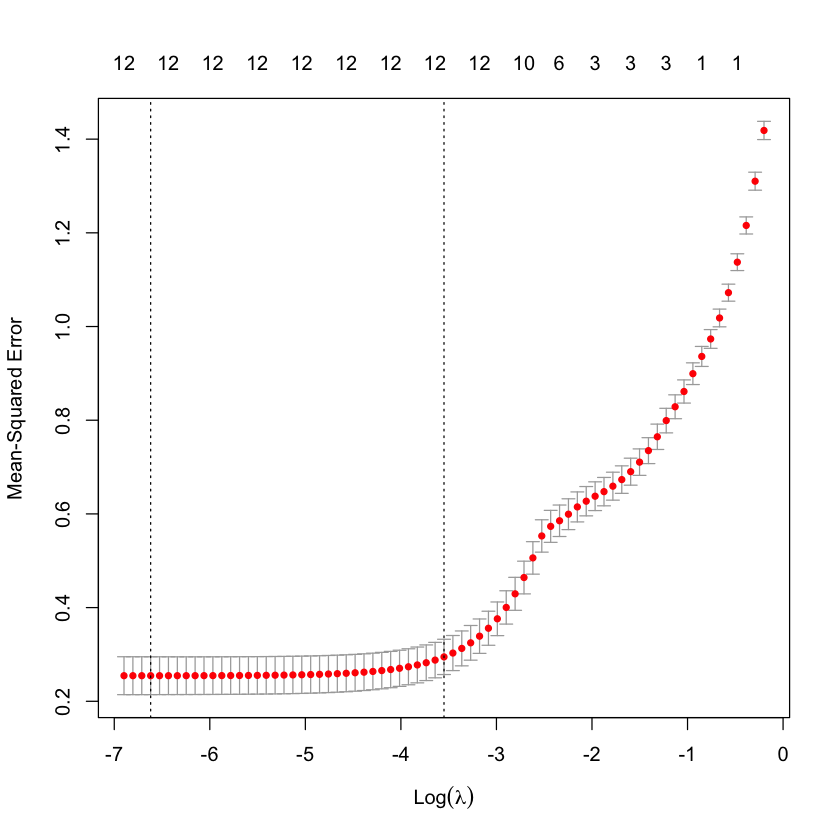

In [74]:
plot(lasso)
lasso$lambda.min
lasso$lambda.1se

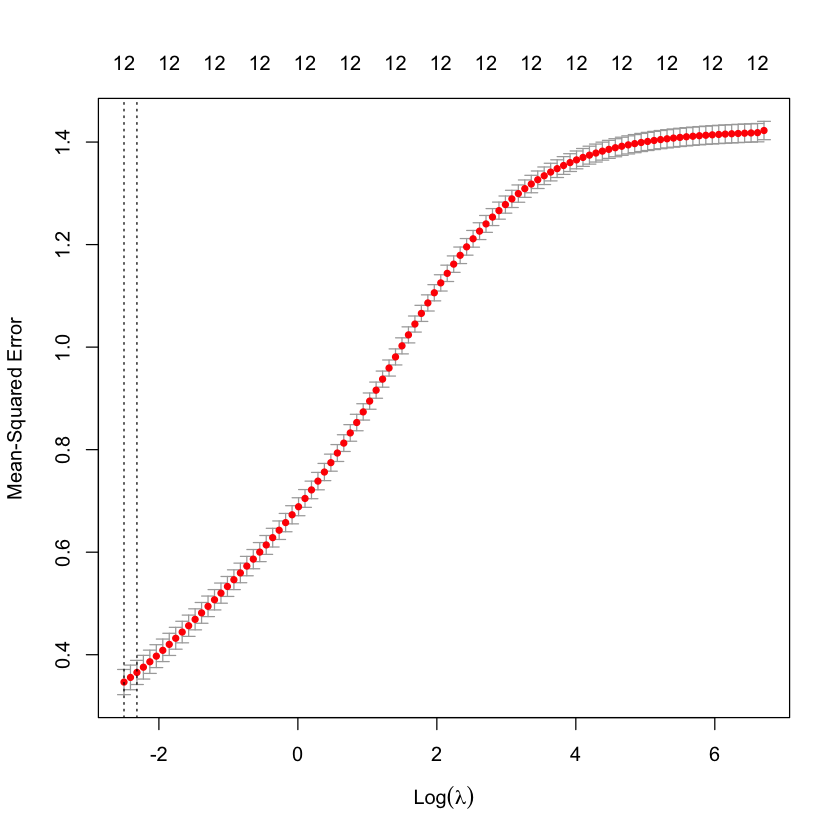

In [62]:
ridge <- cv.glmnet(make_model_matrix(full_mod), df$alcohol, alpha = 0)
plot(ridge)

In [81]:
x_vars <- c("chlorides","volatile_acidity", "residual_sugar")
combn(x_vars, 3, simplify = F)
library(purrr)
my_list <- list(1, 2, 3, 4, 5)
map(my_list, ~ .x^2)



[[1]]
[1] "chlorides"        "volatile_acidity" "residual_sugar"

[[1]]
[1] 1

[[2]]
[1] 4

[[3]]
[1] 9

[[4]]
[1] 16

[[5]]
[1] 25

In [86]:
mtcars %>% split(mtcars$cyl) %>% map(\(df) lm(mpg ~ wt, data=df)) %>% map(summary) %>% map_dbl("r.squared")

4         6         8 
0.5086326 0.4645102 0.4229655